In [2]:
pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 59.3 MB/s eta 0:00:00


In [6]:
! git clone https://github.com/xahid007/Machine_learning_for_flood_susceptibility.git

Cloning into 'Machine_learning_for_flood_susceptibility'...
remote: Enumerating objects: 142, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 142 (delta 17), reused 41 (delta 15), pack-reused 98
Receiving objects: 100% (142/142), 307.79 MiB | 22.99 MiB/s, done.
Resolving deltas: 100% (59/59), done.
Updating files: 100% (38/38), done.


In [45]:
# Import used packages
import geopandas as gpd  # used to read the shapfile
import rasterio as rio   # used to read the raster (.tif) files
from rasterio.plot import show # used to make plots using rasterio
import matplotlib.pyplot as plt #to make plots using matplotlib

In [46]:
link = '/content/Machine_learning_for_flood_susceptibility/point-based models/Input_data_points'
# Read your point shapefiles (Flooded and Non Flooded locations)
points = gpd.read_file(f'{link}/Points.shp')

In [19]:
points.head()

,Label,geometry
0,0,POINT Z (382328.441 5814043.781 0.000)
1,0,POINT Z (382580.854 5814097.359 0.000)
2,0,POINT Z (382758.655 5814802.211 0.000)
3,0,POINT Z (382782.361 5815220.465 0.000)
4,0,POINT Z (382814.111 5816035.383 0.000)


In [47]:
# make columns to extract the values of each predictive feature
# for each point.
points['DEM']=0 #
points['Slope']=0
points['Aspect']=0
points['Curvature']=0
points['TWI']=0
points['DTDrainage']=0
points['DTRoad']=0
points['DTRiver']=0
points['CN']=0
points['AP']=0  #Max daily precipitation
points['FP']=0  #Frequency of extreme precipitation event.

In [21]:
points.head()

,Label,geometry,DEM,Slope,Aspect,Curvature,TWI,DTDrainage,DTRoad,DTRiver,CN,AP,FP
0,0,POINT Z (382328.441 5814043.781 0.000),0,0,0,0,0,0,0,0,0,0,0
1,0,POINT Z (382580.854 5814097.359 0.000),0,0,0,0,0,0,0,0,0,0,0
2,0,POINT Z (382758.655 5814802.211 0.000),0,0,0,0,0,0,0,0,0,0,0
3,0,POINT Z (382782.361 5815220.465 0.000),0,0,0,0,0,0,0,0,0,0,0
4,0,POINT Z (382814.111 5816035.383 0.000),0,0,0,0,0,0,0,0,0,0,0


In [48]:
#The predictive features are in raster format so we use rasterio package to
#read them and convert them to numpy array

DEM_raster=rio.open('/content/Machine_learning_for_flood_susceptibility/Predictive_Features_resolution_30_m/DEM.tif')
DEM_arr=DEM_raster.read(1)

Slope_raster=rio.open('/content/Machine_learning_for_flood_susceptibility/Predictive_Features_resolution_30_m/Slope.tif')
Slope_arr=Slope_raster.read(1)

Aspect_raster=rio.open('/content/Machine_learning_for_flood_susceptibility/Predictive_Features_resolution_30_m/Aspect.tif')
Aspect_arr=Aspect_raster.read(1)

Curvature_raster=rio.open('/content/Machine_learning_for_flood_susceptibility/Predictive_Features_resolution_30_m/Curvature.tif')
Curvature_arr=Curvature_raster.read(1)

TWI_raster=rio.open('/content/Machine_learning_for_flood_susceptibility/Predictive_Features_resolution_30_m/TWI.tif')
TWI_arr=TWI_raster.read(1)

DTRoad_raster=rio.open('/content/Machine_learning_for_flood_susceptibility/Predictive_Features_resolution_30_m/DTRoad.tif')
DTRoad_arr=DTRoad_raster.read(1)

DTRiver_raster=rio.open('/content/Machine_learning_for_flood_susceptibility/Predictive_Features_resolution_30_m/DTRiver.tif')
DTRiver_arr=DTRiver_raster.read(1)

DTDrainage_raster=rio.open('/content/Machine_learning_for_flood_susceptibility/Predictive_Features_resolution_30_m/DTDrainage.tif')
DTDrainage_arr=DTDrainage_raster.read(1)

CN_raster=rio.open('/content/Machine_learning_for_flood_susceptibility/Predictive_Features_resolution_30_m/CN.tif')
CN_arr=CN_raster.read(1)

AP_raster=rio.open('/content/Machine_learning_for_flood_susceptibility/Predictive_Features_resolution_30_m/AP.tif')
AP_arr=AP_raster.read(1)

FP_raster=rio.open('/content/Machine_learning_for_flood_susceptibility/Predictive_Features_resolution_30_m/FP.tif')
FP_arr=FP_raster.read(1)

<Axes: >

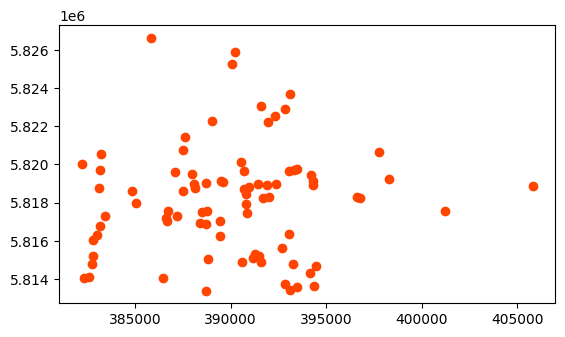

In [52]:
points.plot(color='orangered')

<Axes: >

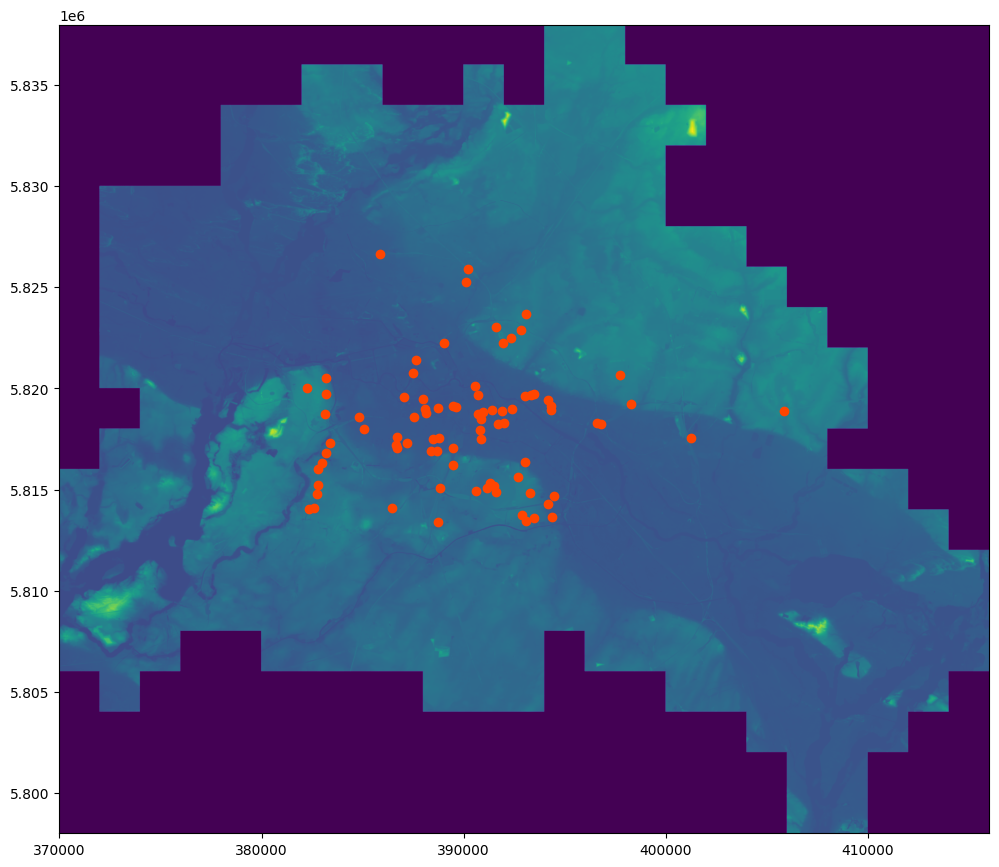

In [55]:
#show point and raster on a matplotlib plot
fig, ax = plt.subplots(figsize=(12,12))
points.plot(ax=ax, color='orangered')
show(DEM_raster, ax=ax)

In [66]:
print(type(DEM_raster),DEM_raster.shape)
print(type(DEM_arr),DEM_arr.shape)
print(DEM_raster.index(382328.441 ,5814043.781))
DEM_arr[2395, 1232]

<class 'rasterio.io.DatasetReader'> (4000, 4600)
<class 'numpy.ndarray'> (4000, 4600)
(2395, 1232)


44.16

In [32]:
# Extracting the raster values to the points shapefile
# count=0
for index,row in points.iterrows(): #iterate over the points in the shapefile
    longitude=row['geometry'].x #get the longitude of the point
    latitude=row['geometry'].y  #get the latitude of the point

    #print("Longitude="+str(longitude))
    #print(count)
    #count +=1

    rowIndex, colIndex=DEM_raster.index(longitude,latitude) # the corresponding pixel to the point (longitude,latitude)

    # Extract the raster values at the point location
    points['DEM'].loc[index]=DEM_arr[rowIndex, colIndex]
    points['Slope'].loc[index]=Slope_arr[rowIndex, colIndex]
    points['Aspect'].loc[index]=Aspect_arr[rowIndex, colIndex]
    points['Curvature'].loc[index]=Curvature_arr[rowIndex, colIndex]
    points['DTRoad'].loc[index]=DTRoad_arr[rowIndex, colIndex]
    points['DTRiver'].loc[index]=DTRiver_arr[rowIndex, colIndex]
    points['DTDrainage'].loc[index]=DTDrainage_arr[rowIndex, colIndex]
    points['TWI'].loc[index]=TWI_arr[rowIndex, colIndex]
    points['CN'].loc[index]=CN_arr[rowIndex, colIndex]
    points['AP'].loc[index]=AP_arr[rowIndex, colIndex]
    points['FP'].loc[index]=FP_arr[rowIndex, colIndex]

<ipython-input-32-054cfa004596>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points['DEM'].loc[index]=DEM_arr[rowIndex, colIndex]
<ipython-input-32-054cfa004596>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points['Slope'].loc[index]=Slope_arr[rowIndex, colIndex]
<ipython-input-32-054cfa004596>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points['Aspect'].loc[index]=Aspect_arr[rowIndex, colIndex]
<ipython-input-32-054cfa

In [33]:
points.head() # to have a look on the calculated fields.

,Label,geometry,DEM,Slope,Aspect,Curvature,TWI,DTDrainage,DTRoad,DTRiver,CN,AP,FP
0,0,POINT Z (382328.441 5814043.781 0.000),44.160000,3.916919,107.641121,0.090000,7.286532,58.309521,28.284271,680.000000,58,80.427414,4.540030
1,0,POINT Z (382580.854 5814097.359 0.000),39.450001,0.182592,101.309929,-0.099998,8.051311,20.000000,10.000000,901.387817,100,84.038452,4.807138
2,0,POINT Z (382758.655 5814802.211 0.000),49.650002,1.502409,151.847183,0.600006,5.943513,50.990196,28.284271,875.556946,72,75.800056,3.624787
3,0,POINT Z (382782.361 5815220.465 0.000),50.520000,1.499948,343.641327,-0.629993,6.638300,60.827625,42.426407,806.039673,58,86.827484,4.670529
4,0,POINT Z (382814.111 5816035.383 0.000),46.340000,1.873798,96.581848,0.279999,5.722488,50.000000,10.000000,820.792297,72,97.448822,5.402912


In [ ]:
# Save the points file
points.to_file('points_data.shp') # save as a shapfile

In [ ]:
# or
points.to_pickle('points_data.pkl') # save as a pickle.